In [161]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [162]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [163]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

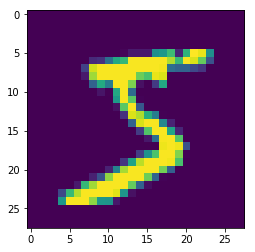

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show()

In [165]:
print(train_labels[0])

5


In [174]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [175]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [176]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels.shape)
print(train_labels[0])
print(test_labels.shape)
print(test_labels[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(10000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [51]:
model.fit(
    train_images, train_labels,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5
60000/60000 [==============================] - 10s 162us/step - loss: 3.3003e-04 - acc: 1.0000
Epoch 2/5
60000/60000 [==============================] - 10s 168us/step - loss: 3.2059e-04 - acc: 1.0000
Epoch 3/5
60000/60000 [==============================] - 10s 167us/step - loss: 3.7255e-04 - acc: 1.0000
Epoch 4/5
60000/60000 [==============================] - 10s 171us/step - loss: 3.0869e-04 - acc: 1.0000
Epoch 5/5
60000/60000 [==============================] - 10s 165us/step - loss: 2.9989e-04 - acc: 1.0000


In [159]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(test_loss, test_accuracy)

10000/10000 [==============================] - 1s 117us/step
0.11122001226503167 0.9839


In [55]:
model.save("model.h5")

In [155]:
import numpy as np
#sample = np.random.random((1,784))
sample = test_images[0].reshape((1, 28 * 28))

prediction = model.predict(sample)
print(prediction)
print(np.argmax(prediction))
print(np.argmax(test_labels[0]))

[[4.3651584e-25 1.0531231e-33 1.2667126e-27 7.2253266e-15 0.0000000e+00
  8.1120531e-27 0.0000000e+00 1.0000000e+00 3.9288616e-25 8.8493492e-22]]
7
7
